In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 51
x_start, x_end = -1, 2
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end,N)
y = numpy.linspace(y_start, y_end,N)
X, Y = numpy.meshgrid(x,y)

In [3]:
x_airfoil=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_airfoil=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigma_airfoil=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')

In [4]:
# X = X - numpy.min(abs(X-x_airfoil[49])) * abs(X[1][numpy.argmin(abs(X-x_airfoil[49]))]-x_airfoil[49])/(X[1][numpy.argmin(abs(X-x_airfoil[49]))]-x_airfoil[49])

# move the mesh toward the leading edge

In [5]:
u_inf = 1.0
a = 0*numpy.pi

u_freestream = u_inf*math.cos(a)*numpy.ones((N,N),dtype = float)
v_freestream = u_inf*math.sin(a)*numpy.ones((N,N),dtype = float)

psi_freestream = u_inf*Y #(Y*math.cos(a)-X*math.sin(a))

In [6]:
def get_velocity(strength, xs, ys, X, Y):

    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [7]:
def get_stream_function(strength, xs, ys, X, Y):

    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [8]:
#strength_source = 5
u_source_sum,v_source_sum,psi_source_sum = 0,0,0

for i in range(0,len(x_airfoil)):
    strength_source = sigma_airfoil[i]
    u_source, v_source = get_velocity(strength_source, x_airfoil[i], y_airfoil[i], X, Y)
    psi_source = get_stream_function(strength_source, x_airfoil[i], y_airfoil[i], X, Y)
    u_source_sum = u_source_sum + u_source
    v_source_sum = v_source_sum + v_source
    psi_source_sum = psi_source_sum + psi_source

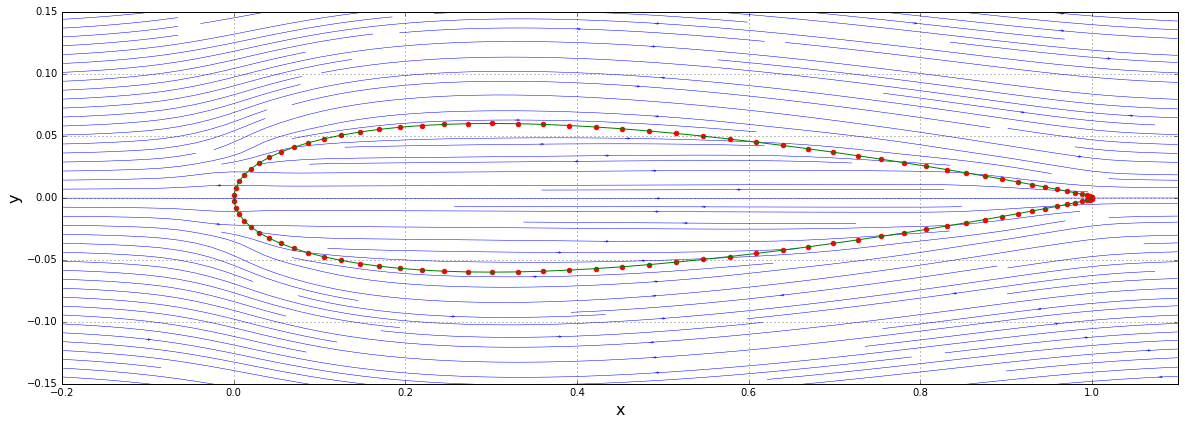

In [9]:
u = u_freestream + u_source_sum
v = v_freestream + v_source_sum
psi = psi_freestream + psi_source_sum


size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start/2+0.3, x_end/2+0.1)
pyplot.ylim(y_start/2+0.1, y_end/2-0.1)
pyplot.streamplot(X, Y, u, v, density=5, linewidth=0.5, arrowsize=0.5, arrowstyle='->')

pyplot.scatter(x_airfoil, y_airfoil, color='r', s=20, marker='o')

pyplot.plot(x_airfoil,y_airfoil)

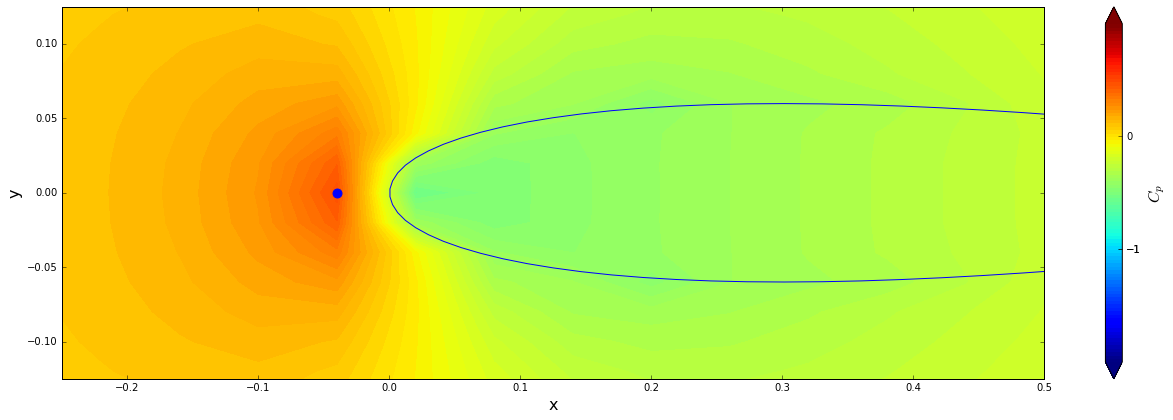

In [10]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 10
pyplot.figure(figsize=(1.1*size*2, (y_end-y_start)/(x_end-x_start)*size*2))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start/4, x_end/4)
pyplot.ylim(y_start/4, y_end/4)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, -1.0, 0.0, 2.0])
pyplot.plot(x_airfoil,y_airfoil)

pyplot.scatter(X[1][numpy.argmax(cp)%N], Y[numpy.argmax(cp)//N][1], color='b', s=80, marker='o')

In [11]:
numpy.max(cp)

0.47144366133162408

In [12]:
numpy.argmax(cp)%N

16

In [13]:
numpy.argmax(cp)//N

25